In [19]:
import tensorflow as tf

# initialize session_test
session_test = tf.Session()

# initialize greetings constant
greetings = tf.constant('Hello, TensorFlow!')

# print greetings
print("greetings: ", session_test.run(greetings))
print("")

# initialize constants x and y
x = tf.constant(10)
y = tf.constant(32)

# add x and y
z = x + y

# print x, y and z
print("x: ", session_test.run(x))
print("y: ", session_test.run(y))
print("z = x + y : ", session_test.run(z))

# close session_test
session_test.close()


greetings:  b'Hello, TensorFlow!'

x:  10
y:  32
z = x + y :  42


In [13]:
import tensorflow as tf

# initialize constants constant_1 and constant_2
constant_1 = tf.constant([1,3,5,7])
constant_2 = tf.constant([2,4,6,8])

# multiply
result = tf.multiply(constant_1, constant_2)

# intialize session_test
session_test = tf.Session()

# print constant_1, constant_2 and result
print("constant_1: ", session_test.run(constant_1))
print("constant_2: ", session_test.run(constant_2))
print("result: ", session_test.run(result))

# close session_test
session_test.close()



constant_1:  [1 3 5 7]
constant_2:  [2 4 6 8]
result:  [ 2 12 30 56]


In [14]:
import tensorflow as tf

# initialize two constants
constant_1 = tf.constant([1,3,5,7])
constant_2 = tf.constant([2,4,6,8])

# multiply
result = tf.multiply(constant_1, constant_2)

with tf.Session() as session_test:
    print("constant_1: ", session_test.run(constant_1))
    print("constant_2: ", session_test.run(constant_2))
    print("result: ", session_test.run(result))
    print("")


constant_1:  [1 3 5 7]
constant_2:  [2 4 6 8]
result:  [ 2 12 30 56]



the dimensions of images:  1
the number of elements of images:  4575
the first instance of images:
[[[210 249 232]
  [204 249 208]
  [197 198 155]
  ..., 
  [ 51  60  40]
  [ 54  64  44]
  [ 57  66  46]]

 [[209 250 236]
  [212 255 217]
  [200 196 156]
  ..., 
  [ 49  57  38]
  [ 51  59  41]
  [ 53  60  42]]

 [[203 246 236]
  [207 246 213]
  [202 192 156]
  ..., 
  [ 47  53  35]
  [ 48  54  36]
  [ 48  55  37]]

 ..., 
 [[  2  22  25]
  [ 26  56  77]
  [ 71 140 159]
  ..., 
  [ 84  77  50]
  [ 68  66  41]
  [ 56  64  44]]

 [[  0  22  32]
  [ 30  75 106]
  [ 87 176 198]
  ..., 
  [ 86  80  52]
  [ 68  66  41]
  [ 55  63  42]]

 [[  0  32  50]
  [ 42 101 135]
  [121 217 239]
  ..., 
  [ 87  80  52]
  [ 70  68  43]
  [ 58  66  46]]]
the dimensions of labels:  1
the number of elements of labels:  4575
the number of labels:  62


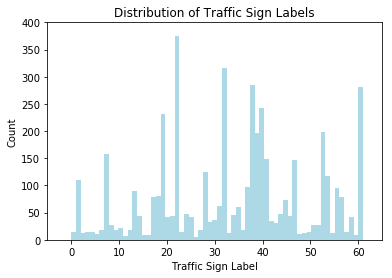


The Traffic Signs Visualization


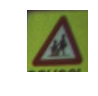

index: 300, shape: (62, 61, 3), min: 3, max: 160


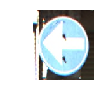

index: 2250, shape: (110, 96, 3), min: 3, max: 255


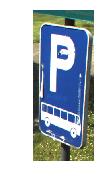

index: 3650, shape: (379, 153, 3), min: 0, max: 255


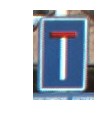

index: 4000, shape: (100, 68, 3), min: 17, max: 255


In [4]:
import os
from skimage import data


def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "data"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)


##################################################

import numpy as np

# convert images and labels to ndarrays
images = np.array(images)
labels = np.array(labels)

# print the dimensions of images
print("the dimensions of images: ", images.ndim)

# print the number of elements of images
print("the number of elements of images: ", images.size)

# print the first instance of images
print("the first instance of images:")
print(images[0])


# print the dimensions of labels
print("the dimensions of labels: ", labels.ndim)

# print the number of elements of labels
print("the number of elements of labels: ", labels.size)

# print the number of labels
print("the number of labels: ", len(set(labels)))


##################################################

import matplotlib.pyplot as plt 

# make a histogram with 62 bins of labels ndarray
plt.hist(labels, 62, color="lightblue")
plt.title("Distribution of Traffic Sign Labels")
plt.xlabel("Traffic Sign Label")
plt.ylabel("Count")
plt.axis([-5, 65, 0, 400])
plt.show()

print("")


##################################################

print("The Traffic Sign Visualization")

import matplotlib.pyplot as plt

# determine the random indexes of the images we are interested in
traffic_signs = [300, 2250, 3650, 4000]

# fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("index: {0}, shape: {1}, min: {2}, max: {3}".format(traffic_signs[i],
                                                  images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))



